# SimCADO and POPPY

## Comparison of the PSFs for the ESOs single- and dual-phase approach

Here we use the POPPY tool to generate mock PSFs for both the single- and the two-phase approaches that ESO is considering.

* **Plan A** involves all 798 primary mirror segments being installed in the E-ELT along with the full set of back-up mirrors which will replace those taken out for cleaning on a nightly basis.

* **Plan B** involves only using 588 segments (i.e. leaving out the inner 5 rings) and not ordering the replacement segments. This will lead to holes in the mirror on a nightly basis as at least 2 segments must be cleaned per night. For plan B we create a pessimistic PSF whit 5 segments missing.

The purpose of this Notebook is to show what can be simulated by combining POPPY with SimCADO. Generating realisitc PSFs for the E-ELT is *not*  in the scope of SimCADO, hence why we are relying on POPPY in this notebook. For simulations where the E-ELT mirror is of no concern, the user is directed to used the SimCADO defaults, i.e. those provided by the SCAO/MCAO teams. 

### Notes

For more information on all the functions used in this notbeook, see the docstrings associated to each function by using the `?` 

    >>> simcado.function_name?


This notebook uses features from the latest development version of SimCADO. 
    
    $ pip3 install --upgrade http://www.univie.ac.at/simcado/SimCADO-0.4dev.zip
    
You will also need to install POPPY, if you haven't already. 

    $ pip3 install poppy

### Links
SimCADO - http://www.univie.ac.at/simcado/

POPPY - https://pythonhosted.org/poppy


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import poppy
import simcado as sim

## Plan A for the E-ELT

798 Segments with all rings

** The Cold stop ** is included in SimCADO's representation of the pupil. Hence why the hexagonal mirror segments aren't visible at the edges of M1. When the cold stop is removed, the PSFs look horrible. See the end of this notebook.

In [2]:
segs_A = sim.psf.get_eelt_segments(plan="A")

Use poppy to visualise the aperture

**Note** that the image displayed below is of poor quality. This has no relation to how the PSFs are generated. They are sampled at at least the nyquist limit for the detectors (i.e. 2mas). The diagonal dots are a product of the fact that the gaps between the segments are present but not resolvable on a 256 pixel image

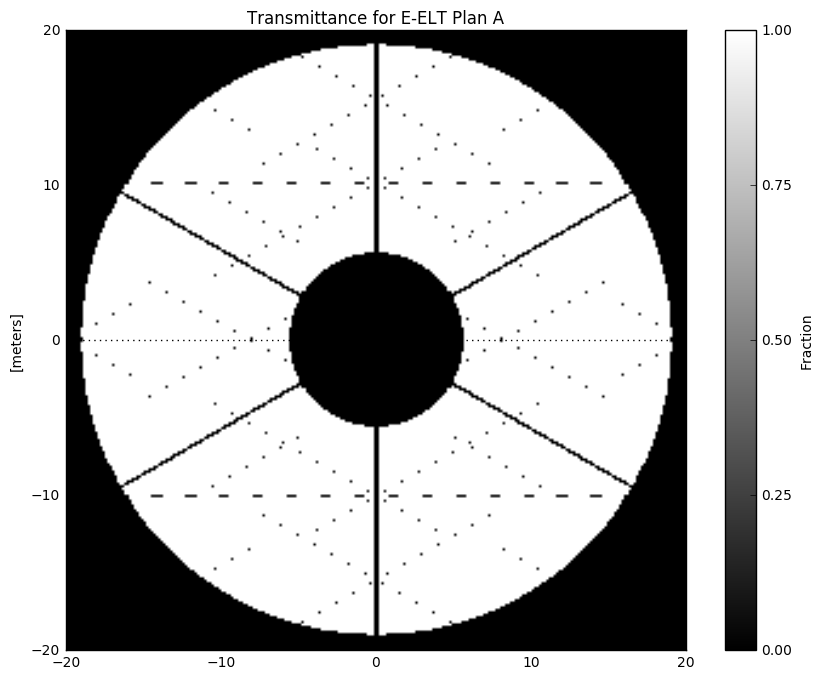

In [3]:
ap = poppy.MultiHexagonAperture(flattoflat=1.256, gap=0.004, segmentlist=segs_A)
sec = poppy.SecondaryObscuration(secondary_radius=5, n_supports=6, support_width=0.2, support_angle_offset=30)

cold_in = poppy.SecondaryObscuration(secondary_radius=11.2/2., n_supports=0)
cold_out = poppy.CircularAperture(radius=38./2.)

eelt_A = poppy.CompoundAnalyticOptic( opticslist=[ap, sec, cold_in, cold_out], name='E-ELT Plan A')

plt.figure(figsize=(10,8))
eelt_A.display(colorbar_orientation='vertical', grid_size=40, npix=256)

## Generate a PSF for the Plan A mirror configuration
This is done by calling the SimCADO function `simcado.psf.poppy_ao_psf()`. A FITS objects is created and kept in memory. 

In [4]:
# Strehl ratio is set to 50% here
psf_A = sim.psf.poppy_ao_psf(strehl=0.5, wavelength=2.2, plan="A")

Generating an E-ELT PSF at 2.2 [um]


Alternatively the PSF can be saved to disk with the keyword, `filename=`:

    sim.psf.poppy_ao_psf(.... , filename="PSF_plan_A.fits")


### Note on the Strehl ratio
As the MAORY goal is 50% Strehl in K band, that is what we have used here. The Strehl ratio is included in the following manner:

    psf = (1-strehl) * seeing_psf + (strehl) * diff_lim_psf
    
The `diff_lim_psf` is generated by POPPY for a segmented mirror. The `seeing_psf` is a moffat function with a FWHM of 0.8". (All of these parameters are accessable to the user - see the docstrings for the SimCADO functions)

### Note on the seeing halo
The default profile used for the seeing halo part of the PSF is a Moffat function with a FWHM of 0.8 arcsec. This can be altered by using the keywords: `fwhm=` in [arcsec] and `psf_type=` "moffat" or "gaussian".

### Note on the lack of structure
In this example, most of the intersting structure has been overshadowed by the Seeing halo. By setting `strehl=1` you can bring out underlying structure due to the hexagonal mirros and 6 spider arms. See the bottom of this notebook for an example (also without cold stop).

    
### Plot the PSF

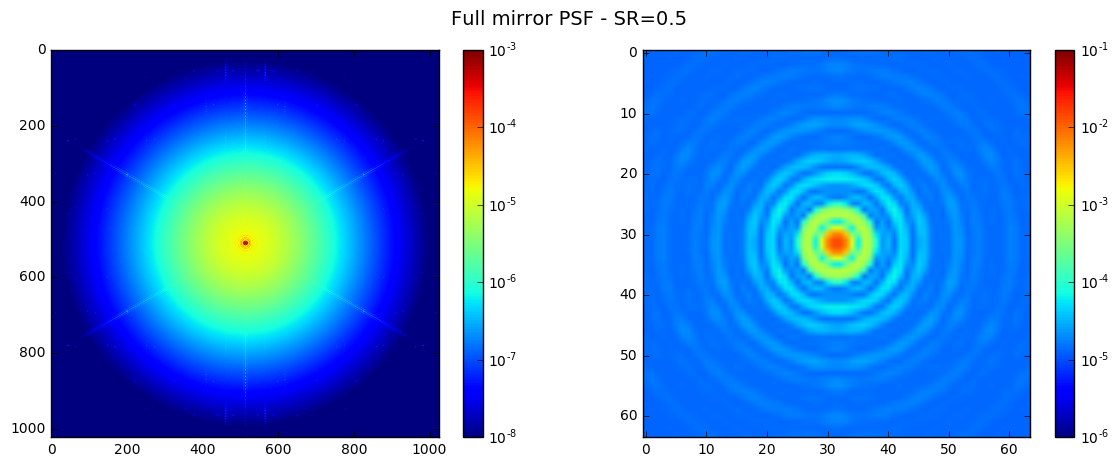

In [5]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.imshow(psf_A[0].data, norm=LogNorm(), vmax=1E-3, vmin=1E-8)
plt.colorbar()

plt.subplot(122)
n=32
plt.imshow(psf_A[0].data[512-n:512+n,512-n:512+n], norm=LogNorm(), vmax=1E-1, vmin=1E-6)
plt.colorbar(); plt.suptitle("Full mirror PSF - SR=0.5", fontsize=14)

## Plan B for the E-ELT
583 segments with the 5 inner rings missing and 5 random segments out for cleaning

In [6]:
segs_B = sim.psf.get_eelt_segments(plan="B", missing=5)

Again we use poppy to visualise the aperture

**Note** that the image displayed below is of poor quality. This has no relation to how the PSFs are generated. They are sampled at at least the nyquist limit for the detectors (i.e. 2mas). The diagonal dots are a product of the fact that the gaps between the segments are present but not resolvable on a 256 pixel image

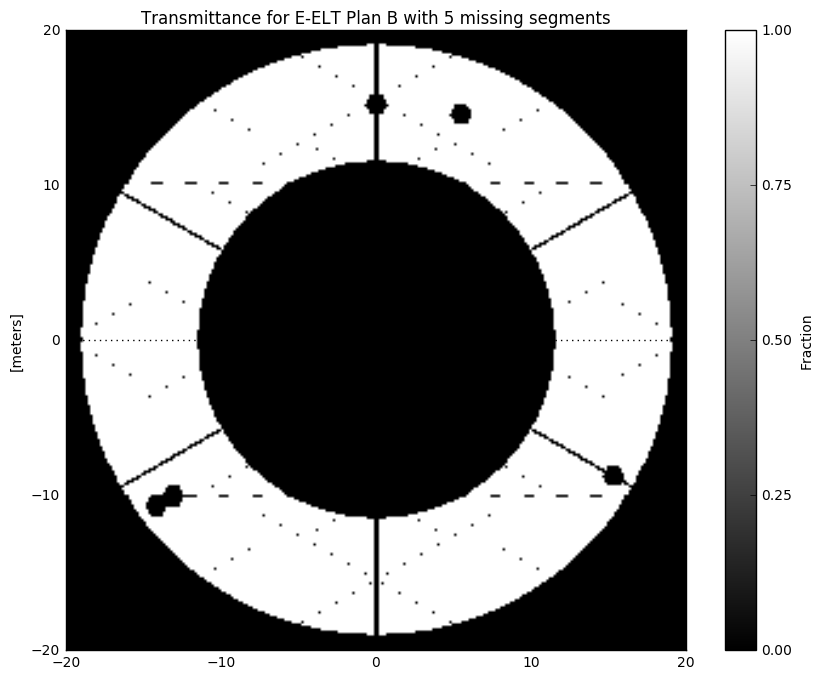

In [7]:
ap = poppy.MultiHexagonAperture(flattoflat=1.256, gap=0.004, segmentlist=segs_B)
sec = poppy.SecondaryObscuration(secondary_radius=5, n_supports=6, support_width=0.2, support_angle_offset=30)

cold_in = poppy.SecondaryObscuration(secondary_radius=23./2., n_supports=0)
cold_out = poppy.CircularAperture(radius=38./2.)

eelt_B = poppy.CompoundAnalyticOptic( opticslist=[ap, sec, cold_in, cold_out], name='E-ELT Plan B with 5 missing segments')

plt.figure(figsize=(10,8))
eelt_B.display(colorbar_orientation='vertical', grid_size=40, npix=256)

## Generate a PSF for the Plan B mirror configuration

In [8]:
# Again Strehl is 50% here
psf_B = sim.psf.poppy_ao_psf(strehl=0.5, wavelength=2.2, plan="B")

Generating an E-ELT PSF at 2.2 [um]


### Plot the Plan B PSF

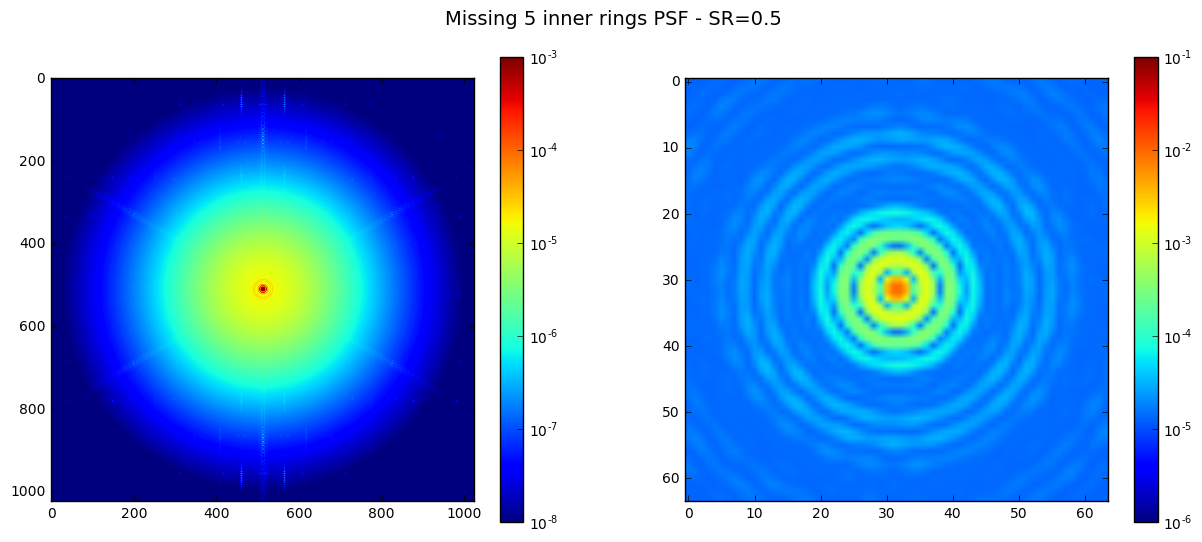

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(psf_B[0].data, norm=LogNorm(), vmax=1E-3, vmin=1E-8)
plt.colorbar()

plt.subplot(122)
n=32
plt.imshow(psf_B[0].data[512-n:512+n,512-n:512+n], norm=LogNorm(), vmax=1E-1, vmin=1E-6)
plt.colorbar(); plt.suptitle("Missing 5 inner rings PSF - SR=0.5", fontsize=14)

### Saving the PSFs to disk

First we should save these PSFs to disk so that SimCADO can read them

In [10]:
psf_A.writeto("PSF_planA.fits", clobber=True)
psf_B.writeto("PSF_planB.fits", clobber=True)

# Using these PSFs in SimCADO

**Note**: it should be pointed out that the PSF generated here are a simpliciation - an ideal diffraction limited PSF summed with a 2D Moffat distribution with a FWHM of 0.8". These should not be taken as "too" realistic. Realistic PSFs are expected to come from the various PSF teams (SCAO/MCAO). 

The **primary objective** of this exercise is to see the difference between two images when the only thing that changes is the mirror configuration.

We have not yet analysed of the detection limits with the two different PSF. The following images are just to illustrate the outcome of using SimCADO with POPPY to look into the proposed changes to the E-ELT's mirror configuration at first light.

### Create a 5000 solar mass cluster
** Stellar distribution is renewed every time **

The SimCADO function `cluster()` generates a random distribution of stars according to an IMF. If you would like to repeat your simulations on the same data set, you should save the source object after generating it - `src.write(filename=...)` - and read it back in with `src = sim.Source(filename=...)`

In [11]:
import simcado as sim
src = sim.source.cluster(mass=5000)

### Run the cluster through SimCADO for Plan A
**1k window**

For the sake of speed, we are only using a 1024x1024 window at the centre of the SimCADO FoV.

** Detector linearity off** 

Because we are assuming that we will stack a series of short exposures, we are not worried about the detector saturating - hence we should turn saturation off with the keyword: `FPA_LINEARITY_CURVE="none"`

In [12]:
img_A = sim.run(src, SCOPE_PSF_FILE="PSF_planA.fits", FPA_LINEARITY_CURVE="none")

Using PSF: PSF_planA.fits
 id x_cen y_cen x_len y_len
--- ----- ----- ----- -----
  0     0     0  1024  1024
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Chip ID: 0 - Creating layer between [um]: 1.933 2.385
Reading out chip 0


Now display the iamge

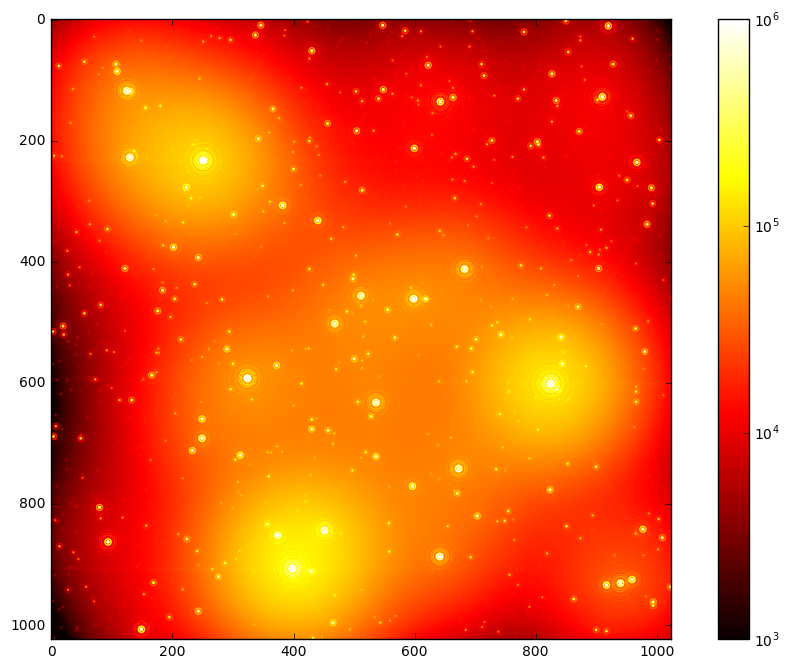

In [13]:
plt.figure(figsize=(12,8))
plt.imshow(img_A[0].data, norm=LogNorm(), vmin=1E3, vmax=1E6, cmap="hot")
plt.colorbar()

### Run the cluster through SimCADO for Plan B

In [14]:
img_B = sim.run(src, SCOPE_PSF_FILE="PSF_planB.fits", FPA_LINEARITY_CURVE="none")

Using PSF: PSF_planB.fits
 id x_cen y_cen x_len y_len
--- ----- ----- ----- -----
  0     0     0  1024  1024
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Chip ID: 0 - Creating layer between [um]: 1.933 2.385
Reading out chip 0


Now display the iamge

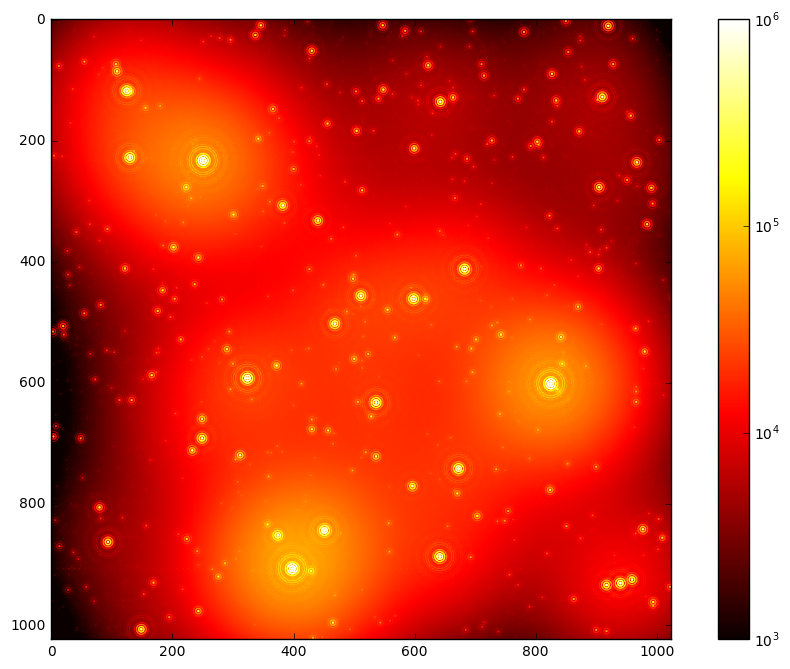

In [15]:
plt.figure(figsize=(12,8))
plt.imshow(img_B[0].data, norm=LogNorm(), vmin=1E3, vmax=1E6, cmap="hot")

plt.colorbar()

### Side by side comparison of dark side region

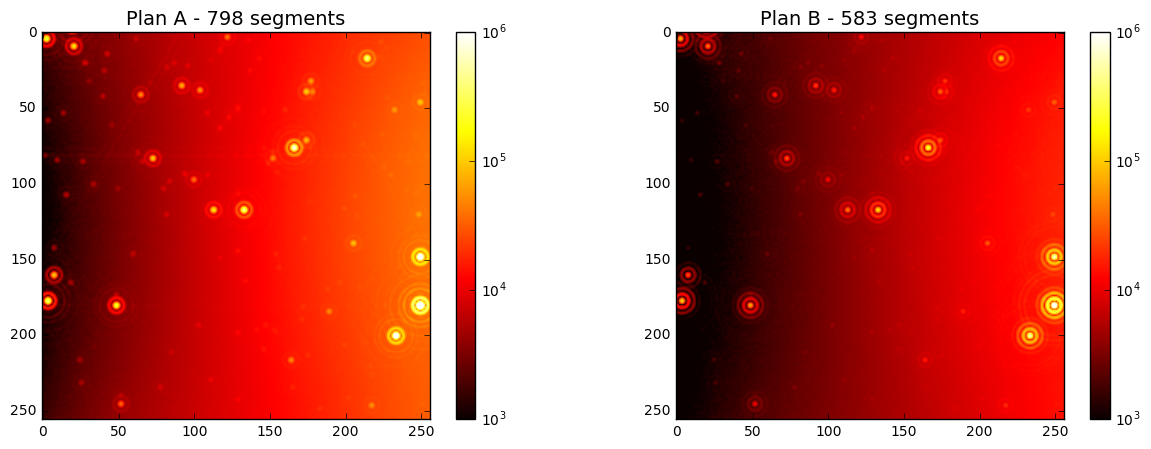

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img_A[0].data[512:768, :256], norm=LogNorm(), vmin=1E3, vmax=1E6, cmap="hot")
plt.colorbar(); plt.title("Plan A - 798 segments", fontsize=14)

plt.subplot(122)
plt.imshow(img_B[0].data[512:768, :256], norm=LogNorm(), vmin=1E3, vmax=1E6, cmap="hot")
plt.colorbar(); plt.title("Plan B - 583 segments", fontsize=14)

These images can we saved to disk so that we can use our favourite pipelines to analyse them properly.

In [16]:
img_A.writeto("img_planA.fits", clobber=True)
img_B.writeto("img_planB.fits", clobber=True)

## For comparison, load in the SCAO PSF that SimCADO has in its data folder

**Note**: it should be pointed out that the PSF generated here are a simpliciation - an ideal diffraction limited PSF summed with a 2D Moffat distribution with a FWHM of 0.8". These should not be taken as "too" realistic. Realistic PSFs are expected to come from the various PSF teams (SCAO/MCAO). 

The **primary objective** of this exercise is to see the difference between two images when the only thing that changes is the mirror configuration.

In [17]:
from astropy.io import fits
psf_scao = fits.open(sim.utils.__pkg_dir__+"/data/PSF_SCAO.fits")
for i in range(3): psf_scao[i].header["PIXELSCL"] = 0.004

### Compare the radial profiles of the two PSFs

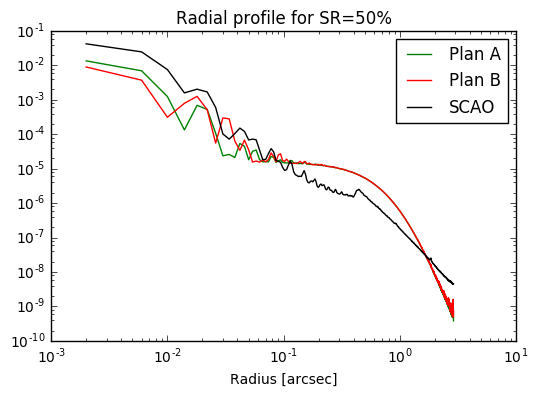

In [18]:
rad_A = poppy.measure_radial(psf_A)
rad_B = poppy.measure_radial(psf_B)
rad_scao = poppy.measure_radial(psf_scao, ext=2)

# Plot the radial profiles
plt.plot(rad_A.x, rad_A.y, "g", label="Plan A")
plt.plot(rad_B.x, rad_B.y, "r", label="Plan B")
plt.plot(rad_scao.x, rad_scao.y, "k", label="SCAO")
plt.loglog(); plt.legend(); plt.xlabel("Radius [arcsec]"); plt.title("Radial profile for SR=50%")

### Compare the encircled energy profiles of the two PSFs

Granted this isn't a fair comparison as SCAO will have a much higher Strehl that MCAO. In this notebook, we are assuming a 50% Strehl as given by the MAORY goals.

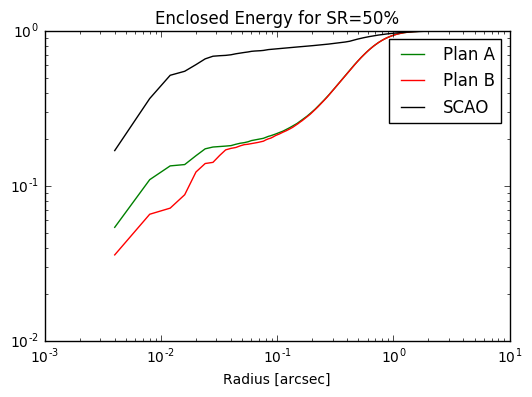

In [19]:
rad_A = poppy.measure_ee(psf_A)
rad_B = poppy.measure_ee(psf_B)
rad_scao = poppy.measure_ee(psf_scao, ext=2)

# Plot the EE profiles
plt.plot(rad_A.x, rad_A.y, "g", label="Plan A")
plt.plot(rad_B.x, rad_B.y, "r", label="Plan B")
plt.plot(rad_scao.x, rad_scao.y, "k", label="SCAO")
plt.loglog(); plt.legend(); plt.xlabel("Radius [arcsec]"); plt.title("Enclosed Energy for SR=50%")

## The cold stop

Here's what the PSF looks like without a cold stop

In [20]:
psf_B = sim.psf.poppy_ao_psf(strehl=1, wavelength=2.2, plan="B", use_cold_stop=False)

Generating an E-ELT PSF at 2.2 [um]


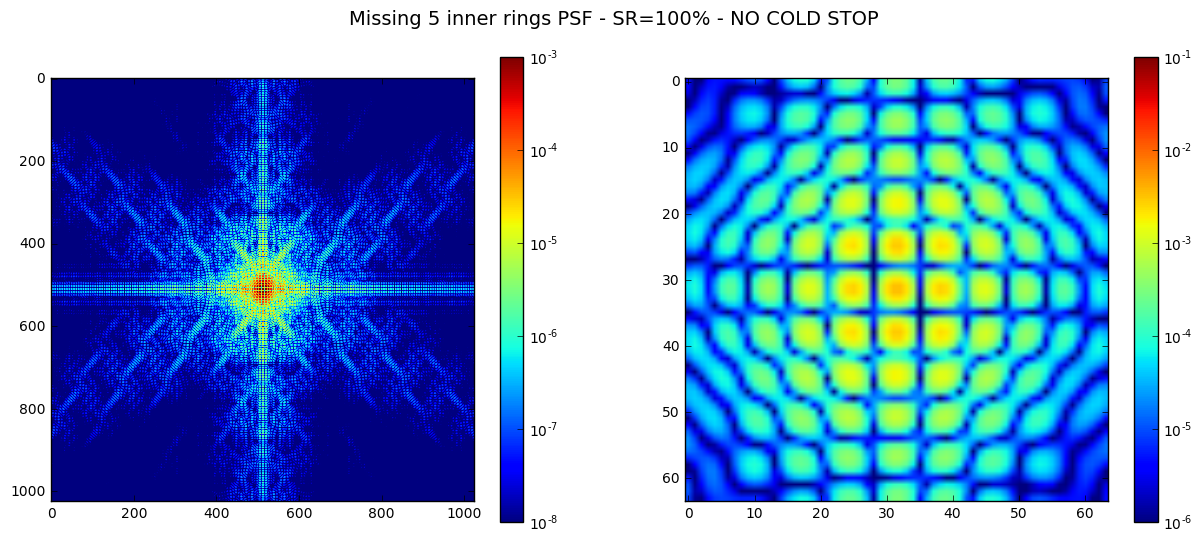

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(psf_B[0].data, norm=LogNorm(), vmax=1E-3, vmin=1E-8)
plt.colorbar()

plt.subplot(122)
n=32
plt.imshow(psf_B[0].data[512-n:512+n,512-n:512+n], norm=LogNorm(), vmax=1E-1, vmin=1E-6)
plt.colorbar(); plt.suptitle("Missing 5 inner rings PSF - SR=100% - NO COLD STOP", fontsize=14)